# 1. Read or Extract data

In [190]:
import os
os.listdir()

['EcoExp.ipynb', 'Income&Expenditure Uncleaned.xlsx', 'Income&Expenditure.csv']

In [191]:
import pandas as pd
data=pd.read_csv("Income&Expenditure Uncleaned.xlsx",sep=",")
data=data.iloc[:,2:]
data.to_csv("Income&Expenditure.csv",sep=",")
data=pd.read_csv("Income&Expenditure.csv").iloc[:,1:]
data

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,Monday,Income,27700.0,Office,Online,27700.0,27700.00,206620.21
1,2,01-08-2023,Tuesday,Expenditure,720.9,Mobile Recharge,Online,26979.1,26979.10,205899.31
2,3,02-08-2023,Wednesday,None,0.0,None,None,26979.1,26979.10,205899.31
3,4,03-08-2023,Thursday,None,0.0,None,None,26979.1,26979.10,205899.31
4,5,04-08-2023,Friday,None,0.0,None,None,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...,...
264,255,31-01-2024,Wednesday,Income,27700.0,Office,Online,27700.0,160080.37,339000.58
265,256,01-02-2024,Thursday,None,0.0,None,None,27700.0,160080.37,339000.58
266,257,02-02-2024,Friday,None,0.0,None,None,27700.0,160080.37,339000.58
267,258,03-02-2024,Saturday,Expenditure,8000.0,NaN,Cash,19700.0,152080.37,331000.58


In [192]:
ndata=data

In [193]:
os.listdir()

['EcoExp.ipynb', 'Income&Expenditure Uncleaned.xlsx', 'Income&Expenditure.csv']

# 2. EDA

In [194]:
data.isnull().sum()

Serial Number        0
Date                 0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     2
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Date               269 non-null    object 
 2   Day                269 non-null    object 
 3   IncExp Status      269 non-null    object 
 4   Rupees             269 non-null    float64
 5   Pupose of IncExp   267 non-null    object 
 6   Payment mode       269 non-null    object 
 7   Monthly Saving     269 non-null    float64
 8   Cumulative Saving  269 non-null    float64
 9   Total Balance      269 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 21.1+ KB


In [196]:
data=data.set_index("Date")
data

,Serial Number,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
Date,,,,,,,,,
31-07-2023,1,Monday,Income,27700.0,Office,Online,27700.0,27700.00,206620.21
01-08-2023,2,Tuesday,Expenditure,720.9,Mobile Recharge,Online,26979.1,26979.10,205899.31
02-08-2023,3,Wednesday,None,0.0,None,None,26979.1,26979.10,205899.31
03-08-2023,4,Thursday,None,0.0,None,None,26979.1,26979.10,205899.31
04-08-2023,5,Friday,None,0.0,None,None,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...
31-01-2024,255,Wednesday,Income,27700.0,Office,Online,27700.0,160080.37,339000.58
01-02-2024,256,Thursday,None,0.0,None,None,27700.0,160080.37,339000.58
02-02-2024,257,Friday,None,0.0,None,None,27700.0,160080.37,339000.58


In [197]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def f(i):
    data[i]=le.fit_transform(data[i])
for i in list(data.columns[data.dtypes=="object"]):
    f(i)
data

,Serial Number,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
Date,,,,,,,,,
31-07-2023,1,1,1,27700.0,29,2,27700.0,27700.00,206620.21
01-08-2023,2,5,0,720.9,22,2,26979.1,26979.10,205899.31
02-08-2023,3,6,2,0.0,28,1,26979.1,26979.10,205899.31
03-08-2023,4,4,2,0.0,28,1,26979.1,26979.10,205899.31
04-08-2023,5,0,2,0.0,28,1,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...
31-01-2024,255,6,1,27700.0,29,2,27700.0,160080.37,339000.58
01-02-2024,256,4,2,0.0,28,1,27700.0,160080.37,339000.58
02-02-2024,257,0,2,0.0,28,1,27700.0,160080.37,339000.58


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 31-07-2023 to 04-02-2024
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Day                269 non-null    int32  
 2   IncExp Status      269 non-null    int32  
 3   Rupees             269 non-null    float64
 4   Pupose of IncExp   269 non-null    int32  
 5   Payment mode       269 non-null    int32  
 6   Monthly Saving     269 non-null    float64
 7   Cumulative Saving  269 non-null    float64
 8   Total Balance      269 non-null    float64
dtypes: float64(4), int32(4), int64(1)
memory usage: 16.8+ KB


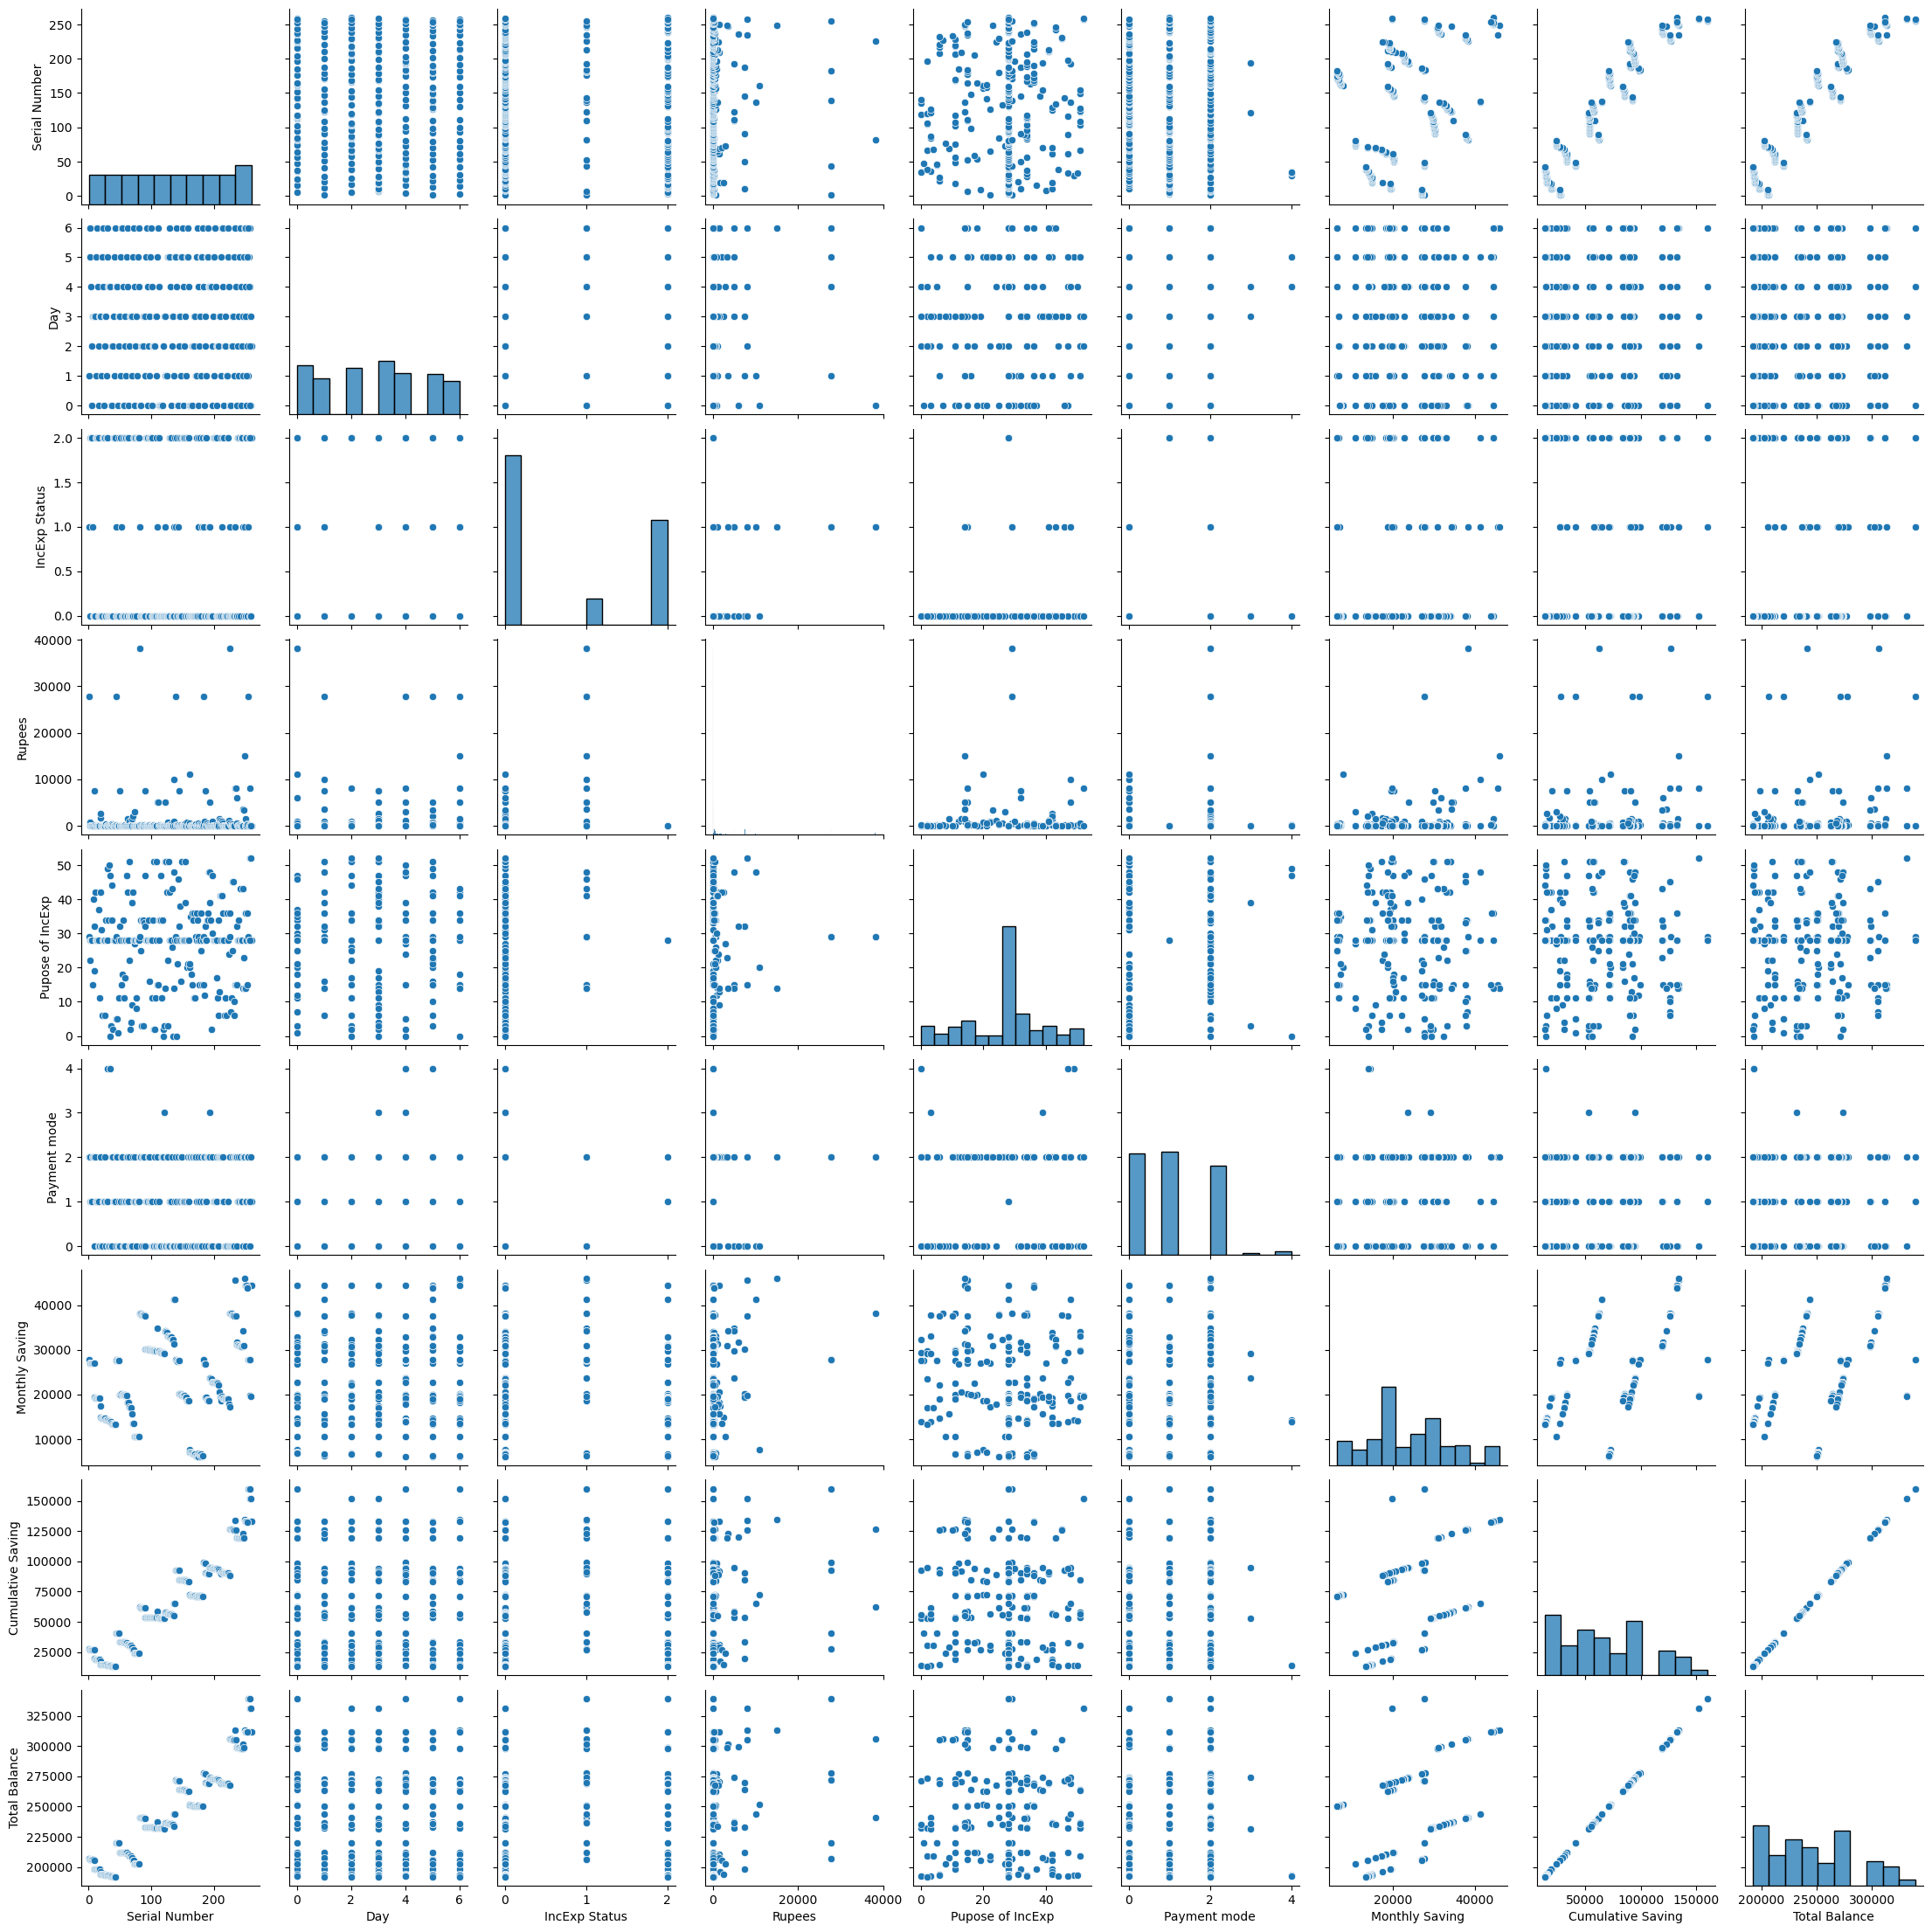

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(data)
plt.show()

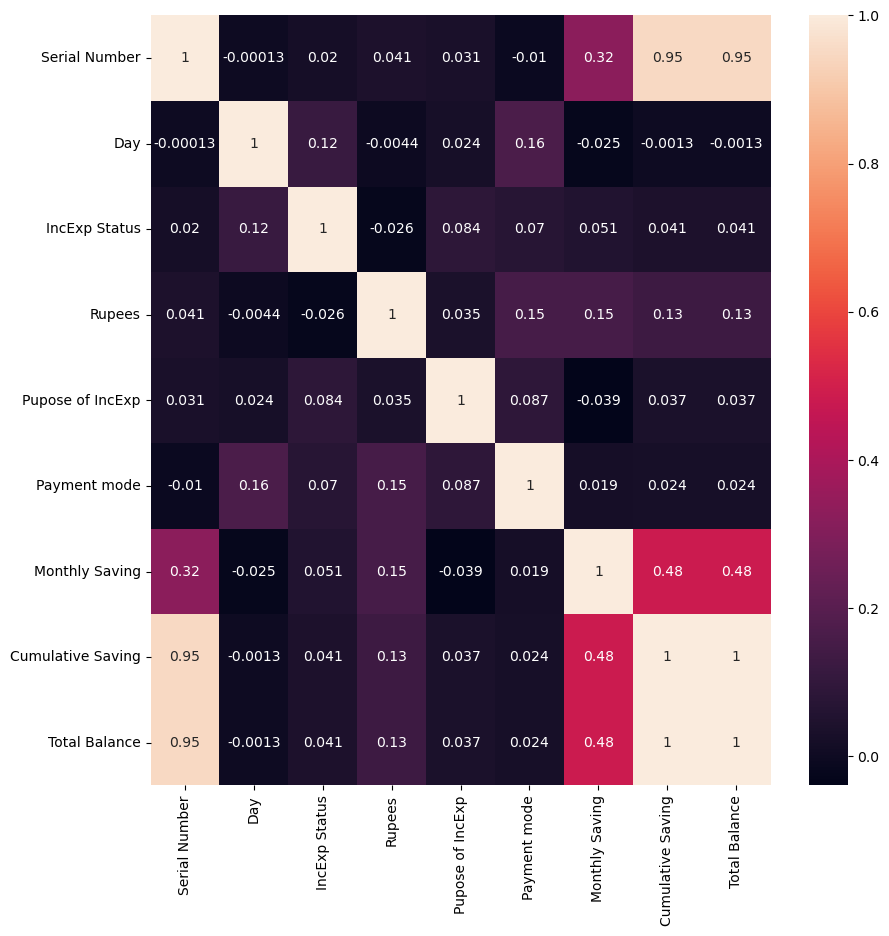

In [200]:
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [201]:
data.columns

Index(['Serial Number', 'Day', 'IncExp Status', 'Rupees', 'Pupose of IncExp',
       'Payment mode', 'Monthly Saving', 'Cumulative Saving', 'Total Balance'],
      dtype='object')

In [202]:
data=data[['Serial Number','Rupees','Monthly Saving','Cumulative Saving','Total Balance']].drop(columns='Cumulative Saving')

In [203]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x

,Serial Number,Rupees,Monthly Saving
Date,,,
31-07-2023,1,27700.0,27700.0
01-08-2023,2,720.9,26979.1
02-08-2023,3,0.0,26979.1
03-08-2023,4,0.0,26979.1
04-08-2023,5,0.0,26979.1
...,...,...,...
31-01-2024,255,27700.0,27700.0
01-02-2024,256,0.0,27700.0
02-02-2024,257,0.0,27700.0


In [204]:
y

Date
31-07-2023    206620.21
01-08-2023    205899.31
02-08-2023    205899.31
03-08-2023    205899.31
04-08-2023    205899.31
                ...    
31-01-2024    339000.58
01-02-2024    339000.58
02-02-2024    339000.58
03-02-2024    331000.58
04-02-2024    330920.58
Name: Total Balance, Length: 269, dtype: float64

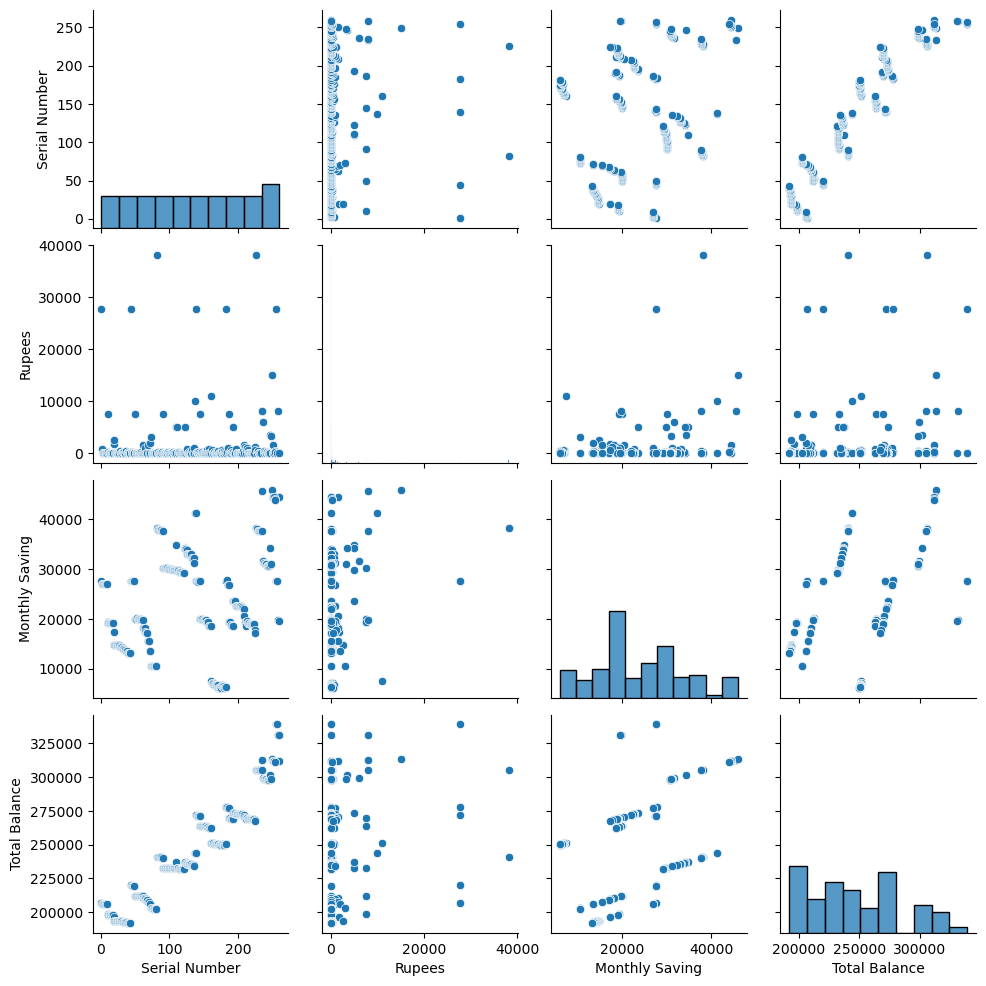

In [205]:
sns.pairplot(data)
plt.show()

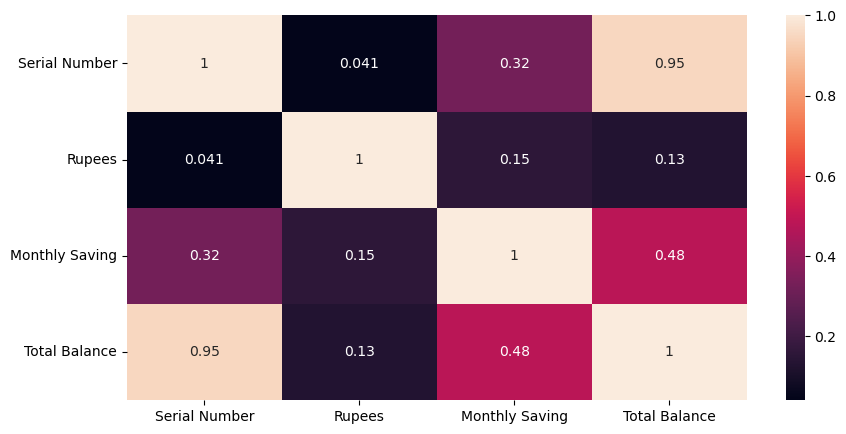

In [206]:
plt.figure(figsize=[10,5])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [207]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [208]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [209]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [210]:
y_pred=model_lr.predict(x_test)
y_pred

array([195201.14429751, 242656.44753292, 213728.6532085 , 249939.81242763,
       267111.78183144, 259871.93703821, 274966.7774013 , 210858.69410391,
       251117.35745749, 296644.28837354, 253897.57606509, 300455.44977571,
       280207.71786308, 234092.94538479, 269458.35997017, 270614.44856661,
       297459.87370728, 301287.01931029, 237834.08502319, 211953.20984775,
       311141.72131156, 270616.15586066, 211273.8800215 , 199621.79683916,
       254619.44700959, 193333.32744797, 192049.35929783, 271800.22441757,
       245753.38032508, 192909.9128013 , 241536.54895127, 213188.17981067,
       253006.12842118, 278968.12346519, 272839.39275628, 193661.32226978,
       244234.79689564, 213076.38018985, 243851.94885608, 243480.06703491,
       193340.18955303, 249455.05320475, 248106.92273656, 192092.66263261,
       212868.09970503, 276292.00882388, 235573.67760156, 250087.18181504,
       233264.64080858, 314153.6585737 , 192156.8940753 , 250686.61877987,
       280974.07070579, 2

In [211]:
y_test

Date
23-08-2023    193209.31
20-10-2023    232083.07
27-09-2023    202728.01
24-10-2023    235772.57
06-12-2023    268721.33
                ...    
08-09-2023    212124.31
09-10-2023    232711.07
07-12-2023    273791.33
26-08-2023    192135.31
11-11-2023    263780.33
Name: Total Balance, Length: 81, dtype: float64

In [212]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

print(f"{model_lr.score(x_test,y_test)}")
print(model_lr.score(x_train,y_train))

6879.584482291354
88246650.19513732
9393.968820213175
0.9381719761733147
0.9436682205050779


In [213]:
len(ndata),len(y_test)

(269, 81)

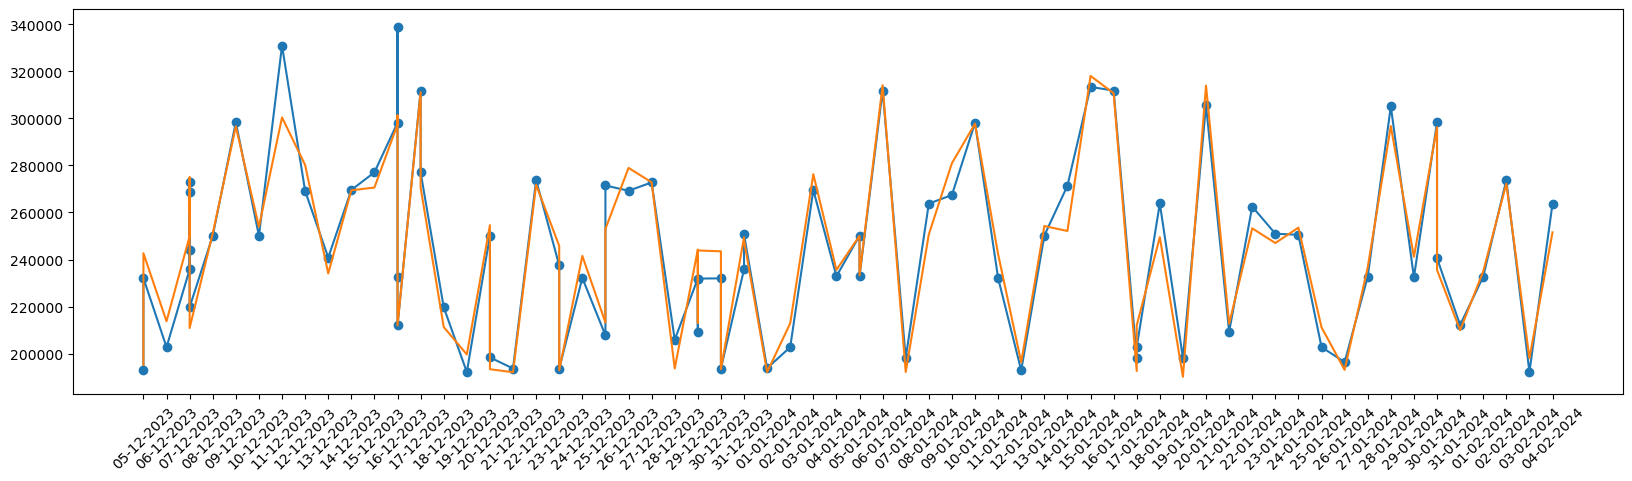

In [216]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,5])
plt.xticks(rotation=45)
plt.plot(ndata["Date"].iloc[len(ndata)-len(y_test):],y_test)
plt.scatter(ndata["Date"].iloc[len(ndata)-len(y_test):],y_test)
plt.plot(ndata["Date"].iloc[len(ndata)-len(y_test):],y_pred)
plt.show()